<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Numpy, Pandas and Visualization Mini Project </h1>
     


<h5 class="list-group-item list-group-item-action active" >1. Create a dataframe like the below format </h5>



|Identifier|    |Date|  |Code_For_Name||Full_Name|
|----------|----|----|--|-----------|------|----------|
|1| |1979 [1978]|   |K. K.| |Mickéy Mousé|
|2| |1868|  |L., L. L.| |Donald Duck|
|218|   |1869|  |RemaÊ¿.||Mini Mouse|
|472|   |1851|  |A'BECKETT, Gilbert Abbott.||Donald Duck|
|5| |1857|  |ABATI, Francesco.||Pink Panther|


>###### 1.A) Clean the `date` column as shown in below format without using replace function.

                                    **Sample Input**

|Date|
|----|
|1979 [1978]| 
|1868|
|1869| 
|1851|
|1857|

                                    **Sample Ouput**

|Date|
|----|
|1979| 
|1868|
|1869| 
|1851|
|1857|


>###### 1.B) Clean the `Code_For_Name` column as shown in below format without using replace function.

                                    **Sample Input**

|Code_For_Name|
|----|
|K. K.| 
|L., L. L.|
|Rema¿.| 
|A'BECKETT, Gilbert Abbott.|
|ABATI, Francesco.|

                                    **Sample Ouput**

|Code_For_Name|
|----|
|KK| 
|LLL|
|Rema| 
|GilbertAbbottAbeckett|
|FrancescoAbati|


>###### 1.C) Clean the `Full_Name` column as shown in below format.

                                    **Sample Input**

|Full_Name|
|----|
|Mickéy Mousé| 
|Donald Duck|
|Mini Mouse| 
|Donald Duck|
|Pink Panther|

                                    **Sample Ouput**

|Firstname||Lastname|
|----|----|----|
|Micky| |Mous|
|Donald||Duck|
|Mini| |Mouse|
|Donald||Duck|
|Pink||Panther|



In [1]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df.csv')
df

,Identifier,Date,Code_For_Name,Full_Name
0,1,1979 [1978],K. K.,Mickéy Mousé
1,2,1868,"L., L. L.",Donald Duck
2,218,1869,RemaÊ¿.,Mini Mouse
3,472,1851,"A'BECKETT, Gilbert Abbott.",Donald Duck
4,5,1857,"ABATI, Francesco.",Pink Panther


####  1.A) Clean the `date` column as shown in below format without using replace function.

In [3]:
df['Date'] = [i if len(i) == 4 else i[:4] for i in df['Date']]
df

,Identifier,Date,Code_For_Name,Full_Name
0,1,1979,K. K.,Mickéy Mousé
1,2,1868,"L., L. L.",Donald Duck
2,218,1869,RemaÊ¿.,Mini Mouse
3,472,1851,"A'BECKETT, Gilbert Abbott.",Donald Duck
4,5,1857,"ABATI, Francesco.",Pink Panther


###### 1.B) Clean the `Code_For_Name` column as shown in below format without using replace function.

In [4]:
a = [''.join([j for j in i if j in 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ']) for i in df['Code_For_Name'][:3]]
b = df['Code_For_Name'][3].split(' ')[1].capitalize()
c = ''.join([i for i in df['Code_For_Name'][3].split(' ')[2] if i.isalpha()]).capitalize()
d = ''.join([i for i in df['Code_For_Name'][3].split(' ')[0] if i.isalpha()]).capitalize()
e = ''.join([i for i in df['Code_For_Name'][4].split(' ')[1] if i.isalpha()]).capitalize()
f = ''.join([i for i in df['Code_For_Name'][4].split(' ')[0] if i.isalpha()]).capitalize()
g = ''.join([b, c, d])
h = ''.join([e, f])
a.extend([g, h])
df['Code_For_Name'] = a
df

,Identifier,Date,Code_For_Name,Full_Name
0,1,1979,KK,Mickéy Mousé
1,2,1868,LLL,Donald Duck
2,218,1869,Rema,Mini Mouse
3,472,1851,GilbertAbbottAbeckett,Donald Duck
4,5,1857,FrancescoAbati,Pink Panther


###### 1.C) Clean the `Full_Name` column as shown in below format.


In [5]:
a = []
for i in df['Full_Name'].str.split(expand=True):
    b = []
    for j in df['Full_Name'].str.split(expand=True)[i]:
        c = []
        for k in j:
            if k in 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ':
                c.append(k)
        b.append(''.join(c))
    a.append(b)
df['FirstName'] = a[0]
df['LastName'] = a[1]
df.drop(columns='Full_Name', inplace=True)
df

,Identifier,Date,Code_For_Name,FirstName,LastName
0,1,1979,KK,Micky,Mous
1,2,1868,LLL,Donald,Duck
2,218,1869,Rema,Mini,Mouse
3,472,1851,GilbertAbbottAbeckett,Donald,Duck
4,5,1857,FrancescoAbati,Pink,Panther


<h5 class="list-group-item list-group-item-action active" >2. Read the dataset called Menu_list_Carbohydrates.csv dataset </h5>

> #### Dataset Content:
This dataset provides a nutrition analysis of every menu item on the Bangalore's famous restaurant's menu, including breakfast, beef burgers, chicken etc..

> ##### A. Display the dataset of dimensions,datatype, statistic summary.

> ##### B. Which are the top 10 items that have the least Carbohydrates?

> ##### C. Which are the top 10 items that have the most Carbohydrates?

> ##### D. Display the bar graph for the frequncy of Categories of food items and write your observations.

> ##### E. An Indian male requires 2500 calories in a day and a female requires 2000 calories in a day to maintain good  

> #####    lifestyle. Find the solutions as displayed in sample output1 and 2.

        Sample Output1:

        * Average calories of 'Beverages' category is 796.67
        * On an Average 'Beverages' contributes to men's calories intake  0.32
        * On an Average 'Beverages' contributes to women's calories intake  0.4

        Sample Output2:

        * Average calories of 'Coffee & Tea' category is 323.33
        * Averagely 'Coffee & Tea' contributes to men's calories intake for  0.13
        * Averagely 'Coffee & Tea' contributes to women's calories intake for  0.16
        
        Steps to get the output1
        1. For each item of Beverages display calorie and calculate the contribution of that food item in the male and females's daily calorie need. 
        2. Calculate average calories for the beverages category
        3. Calculate average contribution of calorie for male's requirement using beverages category
        4. Calculate average contribution of calorie for female's requirement using beverages category
        
        Steps to get the output2
        1. For each item of 'Coffee & Tea' display calorie and calculate the contribution of that food item in the male and    females's daily calorie need. 
        2. Calculate average calories for the 'Coffee & Tea' category
        3. Calculate average contribution of calorie for male's requirement using 'Coffee & Tea' category
        4. Calculate average contribution of calorie for female's requirement using 'Coffee & Tea' category

> ##### F. If you order grilled chicken rather than crispy chicken, what is the change in calorie intake?

            Step1:  Display the suitable graph for the number of calories in Crispy Chicken category

            Step2: Find the average calories for Crispy Chicken Category

            Step3: Display the suitable graph for the number of calories in Grilled Chicken category

            Step4: Find the average calories for Grilled Chicken Category

            Step5: Get the final visual comparison of Crispy vs Grilled on the basis of calories

            Step6: Write your observations.
            
> ##### G. Plot scatter plot between carbohydrates and calories


#### A. Display the dataset of dimensions,datatype, statistic summary.

In [6]:
df = pd.read_csv('Menu_list_Carbohydrates.csv')
df.describe()

,Carbohydrates,Sugars,Protein,Calories
count,53.000000,53.00000,53.000000,53.000000
mean,43.169811,8.45283,21.716981,523.207547
std,29.685360,7.18590,9.841782,209.530369
min,0.000000,0.00000,1.000000,150.000000
25%,25.000000,3.00000,17.000000,410.000000
50%,39.000000,7.00000,20.000000,480.000000
75%,58.000000,14.00000,28.000000,600.000000
max,135.000000,32.00000,48.000000,1150.000000


In [7]:
df.ndim

2

In [8]:
df.dtypes

Category_Type    object
Item_in_Menu     object
Carbohydrates     int64
Sugars            int64
Protein           int64
Calories          int64
dtype: object

#### B. Which are the top 10 items that have the least Carbohydrates?

In [9]:
df.sort_values(by='Carbohydrates', ascending=True).head(10)

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories
38,Coffee & Tea,Iced Tea (Large),0,0,1,150
37,Coffee & Tea,Iced Tea (Medium),0,2,12,300
36,Coffee & Tea,Iced Tea (Small),0,14,15,520
26,Snacks & Sides,Apple Slices,4,7,33,670
25,Snacks & Sides,Side Salad,4,8,30,570
31,Desserts,Kids Ice Cream Cone,7,17,36,1090
11,Salads,Premium Bacon Ranch Salad with Grilled Chicken,8,3,11,480
9,Salads,Premium Bacon Ranch Salad (without Chicken),10,4,20,470
24,Snacks & Sides,Kids French Fries,15,7,30,620
12,Salads,Premium Southwest Salad (without Chicken),20,2,18,510


#### C. Which are the top 10 items that have the most Carbohydrates?

In [10]:
df.sort_values(by='Carbohydrates', ascending=False).head(10)

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories
50,Smoothies & Shakes,Vanilla Shake (Large),135,7,24,430
52,Smoothies & Shakes,Strawberry Shake (Medium),114,7,22,380
49,Smoothies & Shakes,Vanilla Shake (Medium),109,7,15,290
51,Smoothies & Shakes,Strawberry Shake (Small),90,14,39,720
48,Smoothies & Shakes,Vanilla Shake (Small),86,6,12,240
41,Smoothies & Shakes,Blueberry Pomegranate Smoothie (Large),79,18,5,260
47,Smoothies & Shakes,Mango Pineapple Smoothie (Large),78,10,48,750
35,Beverages,Coca-Cola Classic (Large),76,14,8,350
44,Smoothies & Shakes,Strawberry Banana Smoothie (Large),74,12,37,600
23,Snacks & Sides,Large French Fries,67,15,21,500


#### D. Display the bar graph for frequncy of `Categories` of food items and write your observations.

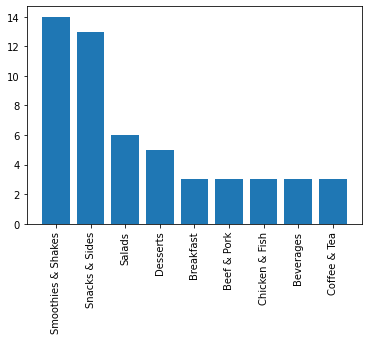

In [11]:
plt.bar(df['Category_Type'].value_counts().index, df['Category_Type'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

#### E. An Indian male requires 2500 calories in a day and a female requires 2000 calories in a day to maintain good lifestyle. Find the solutions as displayed in sample output1 and 2.
    Sample Output1:

    * Average calories of 'Beverages' category is 796.67
    * On an Average 'Beverages' contributes to men's calories intake  0.32
    * On an Average 'Beverages' contributes to women's calories intake  0.4
    
    Steps to get the output1
    1. For each item of Beverages display calorie and calculate the contribution of that food item in the male and females's daily calorie need. 
    2. Calculate average calories for the beverages category
    3. Calculate average contribution of calorie for male's requirement using beverages category
    4. Calculate average contribution of calorie for female's requirement using beverages category


In [12]:
a = df[df['Category_Type'] == 'Beverages']['Calories'].mean()
print(f'Average calories of \'Beverages\' category is {round(a, 2)}')
print(f'On an Average \'Beverages\' contributes to men\'s calories intake {round((a / 2500), 2)}')
print(f'On an Average \'Beverages\' contributes to women\'s calories intake {round((a / 2000), 2)}')

Average calories of 'Beverages' category is 796.67
On an Average 'Beverages' contributes to men's calories intake 0.32
On an Average 'Beverages' contributes to women's calories intake 0.4


**Sample Output2**

* Average calories of 'Coffee & Tea' category is 323.33
* Averagely 'Coffee & Tea' contributes to men's calories intake for  0.13
* Averagely 'Coffee & Tea' contributes to women's calories intake for  0.16

    Steps to get the output2
    1. For each item of 'Coffee & Tea' display calorie and calculate the contribution of that food item in the male and    females's daily calorie need. 
    2. Calculate average calories for the 'Coffee & Tea' category
    3. Calculate average contribution of calorie for male's requirement using 'Coffee & Tea' category
    4. Calculate average contribution of calorie for female's requirement using 'Coffee & Tea' category

In [13]:
a = df[df['Category_Type'] == 'Coffee & Tea']['Calories'].mean()
print(f'Average calories of \'Coffee & Tea\' category is {round(a, 2)}')
print(f'On an Average \'Coffee & Tea\' contributes to men\'s calories intake {round((a / 2500), 2)}')
print(f'On an Average \'Coffee & Tea\' contributes to women\'s calories intake {round((a / 2000), 2)}')

Average calories of 'Coffee & Tea' category is 323.33
On an Average 'Coffee & Tea' contributes to men's calories intake 0.13
On an Average 'Coffee & Tea' contributes to women's calories intake 0.16


#### F. If you order grilled chicken rather than crispy chicken, what is the change in calorie intake?
        Step1:  Display the suitable graph for the number of calories in Crispy Chicken category

        Step2: Find the average calories for Crispy Chicken Category

        Step3: Display the suitable graph for the number of calories in Grilled Chicken category

        Step4: Find the average calories for Grilled Chicken Category

        Step5: Get the final visual comparison of Crispy vs Grilled on the basis of calories

        Step6: Write your observations.

##### Step1: Display the suitable graph for the number of calories in Crispy Chicken category

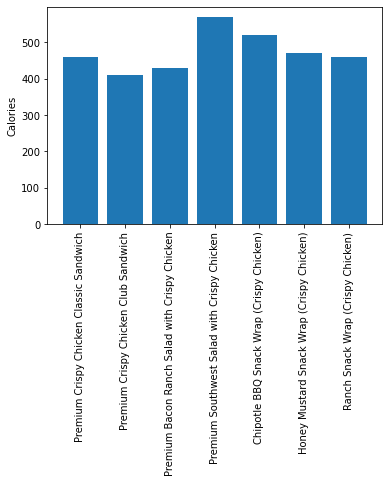

In [14]:
plt.bar(df[df['Item_in_Menu'].str.contains('Crispy')]['Item_in_Menu'], df[df['Item_in_Menu'].str.contains('Crispy')]['Calories'])
plt.xticks(rotation=90)
plt.ylabel('Calories')
plt.show()

##### Step2: Find the average calories for Crispy Chicken Category

In [15]:
df[df['Item_in_Menu'].str.contains('Crispy')]['Calories'].mean()

474.2857142857143

##### Step3: Display the suitable graph for the number of calories in Grilled Chicken category

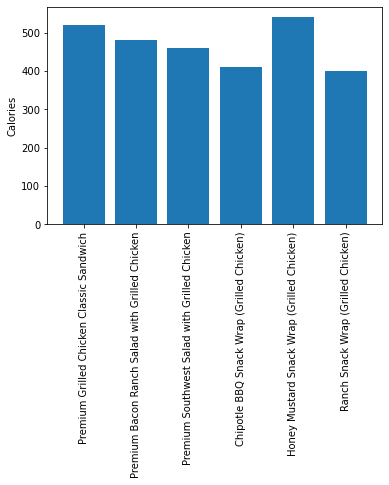

In [16]:
plt.bar(df[df['Item_in_Menu'].str.contains('Grilled')]['Item_in_Menu'], df[df['Item_in_Menu'].str.contains('Grilled')]['Calories'])
plt.xticks(rotation=90)
plt.ylabel('Calories')
plt.show()

##### Step4:Find the average calories for Grilled Chicken Category

In [17]:
df[df['Item_in_Menu'].str.contains('Grilled')]['Calories'].mean()

468.3333333333333

##### Step 5: Get the final visual comparison of Crispy vs Grilled on the basis of calories

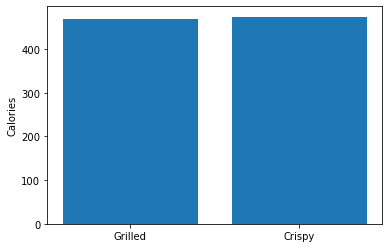

In [18]:
ag = round(df[df['Item_in_Menu'].str.contains('Grilled')]['Calories'].mean(), 2)
ac = round(df[df['Item_in_Menu'].str.contains('Crispy')]['Calories'].mean(), 2)
plt.bar(['Grilled', 'Crispy'], [ag, ac])
plt.ylabel('Calories')
plt.show()

##### Step6: Write your observations

##### G. Plot scatter plot between carbohydrates and calories

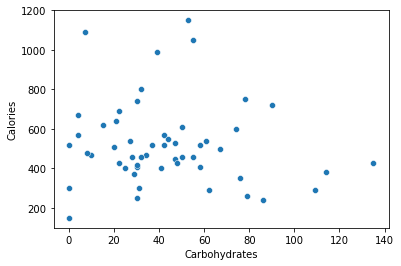

In [19]:
sns.scatterplot(data=df, x='Carbohydrates', y='Calories')
plt.show()